In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [190]:
# import dataframe
risk_df = pd.read_csv('./transactions_with_country.csv')

# Display
risk_df

,TransactionID,CustomerID,Amount,Currency,SourceCountry,DestinationCountry,Date
0,TXN1,CUST313,89547,USD,Iran,Switzerland,2025-10-19
1,TXN2,CUST1880,31584,USD,Iran,USA,2023-01-16
2,TXN3,CUST607,16063,USD,Venezuela,Yemen,2023-01-04
3,TXN4,CUST359,45242,USD,Canada,Yemen,2023-08-03
4,TXN5,CUST2196,84124,USD,Switzerland,North Korea,2025-09-18
...,...,...,...,...,...,...,...
7229,TXN7230,CUST3079,28730,USD,Panama,Somalia,2024-09-13
7230,TXN7231,CUST3446,2204,USD,Syria,USA,2023-10-06
7231,TXN7232,CUST545,58497,USD,Iraq,Mexico,2023-03-06
7232,TXN7233,CUST1137,90289,USD,China,Yemen,2024-02-13


In [191]:
# Get information on the dataset
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TransactionID       7234 non-null   object
 1   CustomerID          7234 non-null   object
 2   Amount              7234 non-null   int64 
 3   Currency            7234 non-null   object
 4   SourceCountry       7234 non-null   object
 5   DestinationCountry  7234 non-null   object
 6   Date                7234 non-null   object
dtypes: int64(1), object(6)
memory usage: 395.7+ KB


In [192]:
# Convert 'Date' column datatype from 'object' to 'datetime'
risk_df['Date'] = pd.to_datetime(risk_df['Date'])
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TransactionID       7234 non-null   object        
 1   CustomerID          7234 non-null   object        
 2   Amount              7234 non-null   int64         
 3   Currency            7234 non-null   object        
 4   SourceCountry       7234 non-null   object        
 5   DestinationCountry  7234 non-null   object        
 6   Date                7234 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 395.7+ KB


# EDA ANALYSIS QUESIONS

In [193]:
# Define high-risk countries (based on asking AI)
high_risk_countries = ['Iran', 'North Korea', 'Afghanistan', 'Syria', 'Iraq', 'Yemen', 'Somalia', 'Venezuela', 'Panama', 'Cayman Islands', 'Russia']

# Find high risk countries in 'SourceCountry'
sourceCountry_high_risk_df = risk_df[risk_df['SourceCountry'].isin(high_risk_countries)]

# Ust above df to find high risk countries in 'DestinationCountry'
high_risk_df = sourceCountry_high_risk_df[sourceCountry_high_risk_df['DestinationCountry'].isin(high_risk_countries)].reset_index(drop=True)

# Display final dataframe containing only high_risk_countires 
high_risk_df

,TransactionID,CustomerID,Amount,Currency,SourceCountry,DestinationCountry,Date
0,TXN3,CUST607,16063,USD,Venezuela,Yemen,2023-01-04
1,TXN6,CUST2298,47748,USD,North Korea,Somalia,2023-04-09
2,TXN10,CUST53,82071,USD,Iraq,Afghanistan,2023-01-22
3,TXN12,CUST3031,33284,USD,Syria,Russia,2023-01-04
4,TXN13,CUST4828,36312,USD,Iran,Iraq,2023-07-12
...,...,...,...,...,...,...,...
2043,TXN7216,CUST1829,21986,USD,Venezuela,Somalia,2023-01-18
2044,TXN7227,CUST3376,18528,USD,Somalia,Afghanistan,2025-09-07
2045,TXN7228,CUST4617,11753,USD,Somalia,Iraq,2023-12-23
2046,TXN7230,CUST3079,28730,USD,Panama,Somalia,2024-09-13


<Figure size 640x480 with 0 Axes>

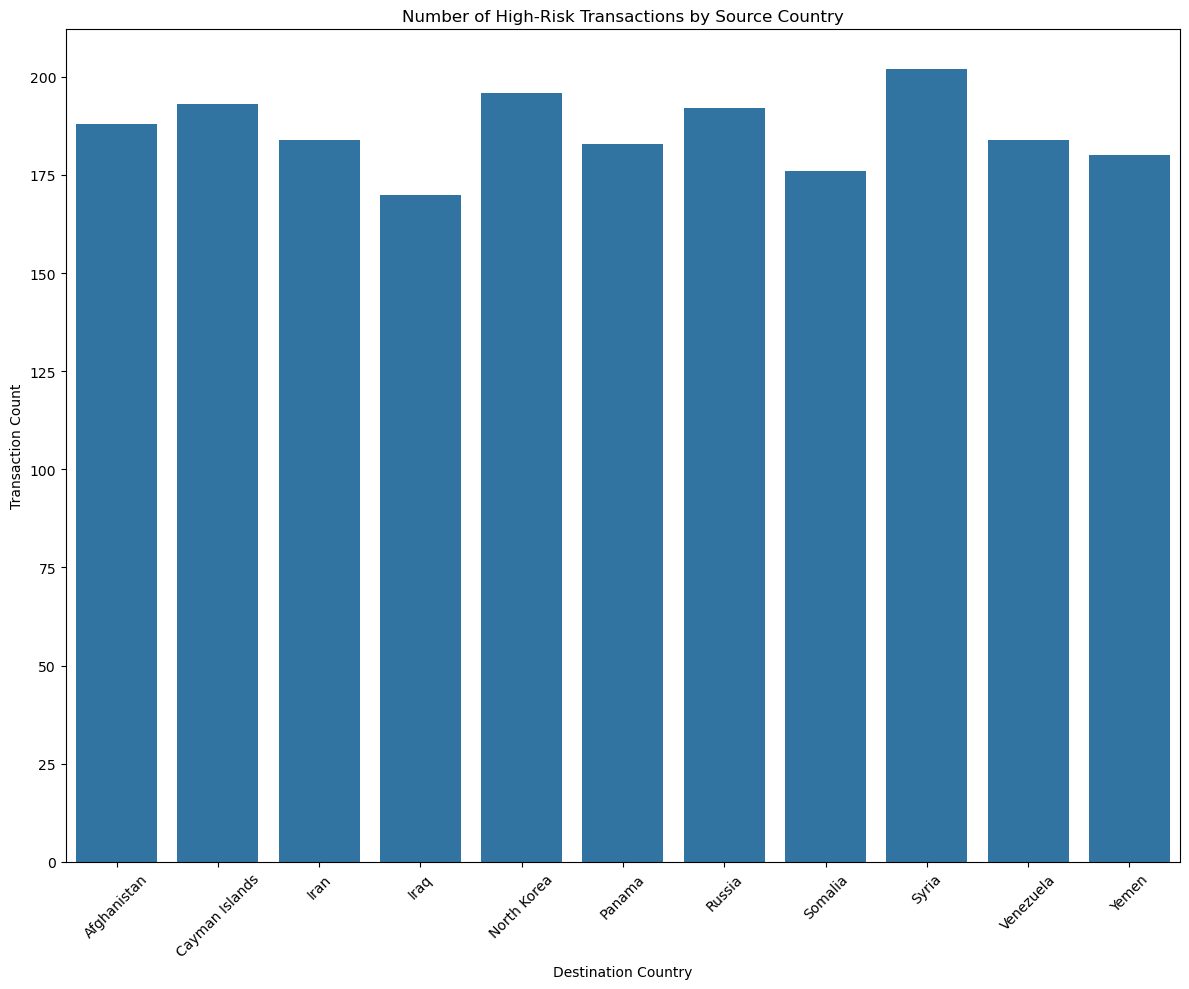

In [ ]:
# What is the total number of transactions per country?
transactions_per_country = high_risk_df.groupby('SourceCountry').agg(
    {'TransactionID': 'count'}
).sort_index().rename(columns={'TransactionID': 'TransactionCount'})

# Plot
# Define plot size
plt.figure(figsize=(12, 10))

# Construct bar graph
sns.barplot(transactions_per_country, x='SourceCountry', y='TransactionCount')

# Add formatting
plt.xticks(rotation=45)
plt.title("Number of High-Risk Transactions by Source Country")
plt.ylabel("Transaction Count")
plt.xlabel("Destination Country")

plt.tight_layout()
plt.show()

In [195]:
# What are the top 10 countries with the most transactions
top_10_countries = high_risk_df.groupby('SourceCountry')['Amount'].count().sort_values(ascending=False)[:10]

# Display 
top_10_countries

SourceCountry
Syria             202
North Korea       196
Cayman Islands    193
Russia            192
Afghanistan       188
Iran              184
Venezuela         184
Panama            183
Yemen             180
Somalia           176
Name: Amount, dtype: int64

In [196]:
# What is the total transaction amount for each currency?
total_amount_per_country = high_risk_df.groupby('Currency')['Amount'].sum().sort_values(ascending=False)
total_amount_per_country

Currency
USD    102362189
Name: Amount, dtype: int64

In [197]:
# What is the average transaction amount?
average_transation_amount = high_risk_df['Amount'].mean()
print(f'The avearge transaction amount is ${average_transation_amount:.2f}')

The avearge transaction amount is $49981.54


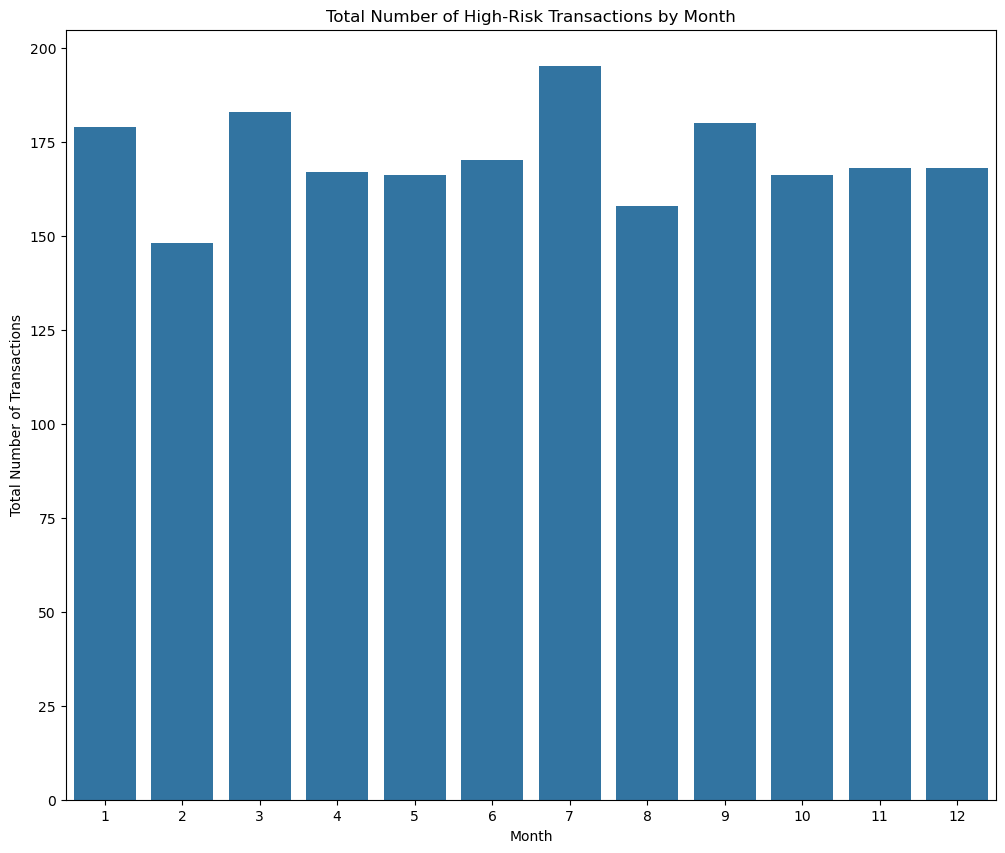

In [ ]:
# How many transactions are there per month?
# Create 'month' column
high_risk_df['Month'] = high_risk_df['Date'].dt.month

# Groupby month and count transactions per month
monthly_transactions = high_risk_df.groupby('Month').agg(
    {'TransactionID': 'count'}
).rename(columns={'TransactionID': 'TransactionCount'})


# Define plot size
plt.figure(figsize=(12, 10))

# Construct bar plot
sns.barplot(monthly_transactions, x='Month', y='TransactionCount')

# Add formatting
plt.title('Total Number of High-Risk Transactions by Month')
plt.ylabel('Total Number of Transactions')
plt.show()
plt.tight_layout()


In [212]:
# Calculate the total amount of money flowing to and from these high-risk jurisdictions.
high_risk_funds = high_risk_df.groupby(['SourceCountry', 'DestinationCountry']).agg(
    {'Amount': 'sum'}
).rename(columns={'Amount':'Total Funds'}).reset_index()

# Display
high_risk_funds

,SourceCountry,DestinationCountry,Total Funds
0,Afghanistan,Cayman Islands,1258440
1,Afghanistan,Iran,519598
2,Afghanistan,Iraq,634565
3,Afghanistan,North Korea,1064635
4,Afghanistan,Panama,1408146
...,...,...,...
105,Yemen,Panama,913788
106,Yemen,Russia,1032793
107,Yemen,Somalia,687878
108,Yemen,Syria,1199225


In [199]:
# What is the total transaction amount for each destination country?
high_risk_df.groupby('DestinationCountry').agg(
    {'Amount': 'sum'}
).rename(columns={'Amount': 'TotalAmount'})

,TotalAmount
DestinationCountry,
Afghanistan,8444318
Cayman Islands,9430057
Iran,8638827
Iraq,9175269
North Korea,9524666
Panama,9979760
Russia,10001879
Somalia,8231571
Syria,8694125
